In [1]:

## pandas

##    datetime
##    group by and pivot table
##    joins
##    outlier treatment


In [ ]:
## missing values

## .fillna(), .dropna(), .isnull(), .isna(), .notna(), .notnull(), .any. .all


## .str broadcasting

## 

In [2]:
import pandas as pd

In [31]:
## Loans Data

loans_df = pd.read_csv("d:/data/LoansData.csv")

In [4]:
loans_df.head(2)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [5]:
## metadata inspection

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [ ]:
## 1. rename columns
## 2. clean Interest rate, debt to income ratio, and loan length, and employment lenght
## 3. take care of missing values

In [7]:
## Step 1: 

## Renaming

loans_df.columns = [column.replace('.', '') for column in loans_df.columns]

In [11]:
## Clean my interest rate

loans_df['InterestRate'] = loans_df.InterestRate.str.replace('%', '').astype('float')

In [12]:
loans_df.head()

,LoanID,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,LoanPurpose,DebtToIncomeRatio,State,HomeOwnership,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [13]:
loans_df.InterestRate.dtype

dtype('float64')

In [15]:
loans_df['DebtToIncomeRatio'] = loans_df.DebtToIncomeRatio.str.replace('%', '').astype('float')

In [21]:
loans_df['EmploymentLenght'] = ( loans_df.EmploymentLength.str.replace('< ', '')
                            .str.replace(' years', '')
                                .str.replace(' year', '')
                                    .str.replace('+', '')).astype('float')

<ipython-input-21-1070e48a2bc4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  loans_df['EmploymentLenght'] = ( loans_df.EmploymentLength.str.replace('< ', '')


In [22]:
loans_df.head(2)

,LoanID,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,LoanPurpose,DebtToIncomeRatio,State,HomeOwnership,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength,EmploymentLenght
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,1.0
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,2.0


In [23]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanID                     2500 non-null   int64  
 1   AmountRequested            2499 non-null   float64
 2   AmountFundedByInvestors    2499 non-null   float64
 3   InterestRate               2498 non-null   float64
 4   LoanLength                 2500 non-null   object 
 5   LoanPurpose                2500 non-null   object 
 6   DebtToIncomeRatio          2499 non-null   float64
 7   State                      2500 non-null   object 
 8   HomeOwnership              2499 non-null   object 
 9   MonthlyIncome              2499 non-null   float64
 10  FICORange                  2498 non-null   object 
 11  OpenCREDITLines            2497 non-null   float64
 12  RevolvingCREDITBalance     2497 non-null   float64
 13  InquiriesintheLast6Months  2497 non-null   float

In [24]:
loans_df.isna().sum()

LoanID                        0
AmountRequested               1
AmountFundedByInvestors       1
InterestRate                  2
LoanLength                    0
LoanPurpose                   0
DebtToIncomeRatio             1
State                         0
HomeOwnership                 1
MonthlyIncome                 1
FICORange                     2
OpenCREDITLines               3
RevolvingCREDITBalance        3
InquiriesintheLast6Months     3
EmploymentLength             77
EmploymentLenght             77
dtype: int64

In [ ]:
## dropping na

In [ ]:
## dropping
## impute



In [25]:
## dropp rows with missing values


loans_df.dropna(inplace=True)

In [27]:
def wrangle_loans_data(df):
    df.columns = [column.replace('.', '') for column in df.columns]
    
    df['InterestRate'] = df.InterestRate.str.replace('%', '').astype('float')
    
    df['DebtToIncomeRatio'] = df.DebtToIncomeRatio.str.replace('%', '').astype('float')
    
    df['EmploymentLenght'] = ( df.EmploymentLength.str.replace('< ', '')
                            .str.replace(' years', '')
                                .str.replace(' year', '')
                                    .str.replace('+', '')).astype('float')
    
    
    df.dropna(inplace=True)
    
    
    return df

In [26]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanID                     2413 non-null   int64  
 1   AmountRequested            2413 non-null   float64
 2   AmountFundedByInvestors    2413 non-null   float64
 3   InterestRate               2413 non-null   float64
 4   LoanLength                 2413 non-null   object 
 5   LoanPurpose                2413 non-null   object 
 6   DebtToIncomeRatio          2413 non-null   float64
 7   State                      2413 non-null   object 
 8   HomeOwnership              2413 non-null   object 
 9   MonthlyIncome              2413 non-null   float64
 10  FICORange                  2413 non-null   object 
 11  OpenCREDITLines            2413 non-null   float64
 12  RevolvingCREDITBalance     2413 non-null   float64
 13  InquiriesintheLast6Months  2413 non-null   float

## Dates in python

In [18]:
loans_df.EmploymentLength

0        < 1 year
1         2 years
2         2 years
3         5 years
4         9 years
          ...    
2495      8 years
2496    10+ years
2497    10+ years
2498      5 years
2499    10+ years
Name: EmploymentLength, Length: 2500, dtype: object

In [29]:
loans_df_clean = wrangle_loans_data(loans_df)

<ipython-input-27-e8b962a988e6>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['EmploymentLenght'] = ( df.EmploymentLength.str.replace('< ', '')


In [30]:
loans_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanID                     2413 non-null   int64  
 1   AmountRequested            2413 non-null   float64
 2   AmountFundedByInvestors    2413 non-null   float64
 3   InterestRate               2413 non-null   float64
 4   LoanLength                 2413 non-null   object 
 5   LoanPurpose                2413 non-null   object 
 6   DebtToIncomeRatio          2413 non-null   float64
 7   State                      2413 non-null   object 
 8   HomeOwnership              2413 non-null   object 
 9   MonthlyIncome              2413 non-null   float64
 10  FICORange                  2413 non-null   object 
 11  OpenCREDITLines            2413 non-null   float64
 12  RevolvingCREDITBalance     2413 non-null   float64
 13  InquiriesintheLast6Months  2413 non-null   float

## working with dates in python

In python, there are most common ways of working with dates.

1. `pandas`
2. `datetime`

You will see 3 major date data types in python.

1. `datetime.datetime()` - represent single date
2. `pd.Timestamp()` - pandas; represent single date
3. `datetime64` - pandas - Series of dates / column of dates






In [32]:
from datetime import datetime

In [33]:
## create a single date object

d1 = datetime(2022, 5, 1)

In [34]:
type(d1)

datetime.datetime

In [35]:
print(dir(d1))

['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


In [37]:
## year, month, day, hour, second, .... 

d1.year

2022

In [38]:
d1.month

5

In [39]:
d1.day

1

In [40]:
d1.hour

0

In [41]:
d1.minute

0

In [42]:
d1.second

0

In [50]:
datetime.today()

datetime.datetime(2023, 7, 8, 14, 54, 21, 538352)

In [44]:
datetime.now()

datetime.datetime(2023, 7, 8, 14, 51, 32, 530108)

In [46]:
## to check what day is it today (mon, tue, sun, sat)

d1.weekday()

6

In [47]:
#0 - Monday
#1 - Tue


#6 - Sun

In [54]:
d2 = pd.Timestamp(2023, 2, 10)

In [56]:
d2.year

2023

In [57]:
d2.month

2

In [58]:
d2.day

10

In [59]:
print(dir(d2))

['__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_date_repr', '_repr_base', '_round', '_short_repr', '_time_repr', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'freq', 'freqstr', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'isoformat', 'isoweekda

In [60]:
pd.Timestamp.today()

Timestamp('2023-07-08 14:57:03.089600')

In [61]:
pd.Timestamp.now()

Timestamp('2023-07-08 14:57:11.165737')

In [62]:
## single dates

## entire collection of dates
## very common to convert a string to date

### `pd.to_datetime()`

#### informat

%d - date %a - day name (short form) %A - day name (full form)

%m - month %b - short name %B - full month name

%y - year (without century) %Y - year (with century)

%H - hours ( 24 hour format ) %I ( 12 hour format ) %p (AM/PM)

%M - minutes

%S - seconds

In [63]:
d1 = ['13-11-2022', '11-10-2022', '11-12-2022']
d2 = ['13 Nov 2022', '11 Oct 2022',  '11 Dec 2022'] 
d3 = ['13/11/2022', '11/10/2022', '11/12/2022']
d4 = ["13 November '20", "11 October '20", "11 December '20"]

In [67]:
pd.to_datetime(d1, format="%d-%m-%Y")

DatetimeIndex(['2022-11-13', '2022-10-11', '2022-12-11'], dtype='datetime64[ns]', freq=None)

In [68]:
pd.to_datetime(d2, format="%d %b %Y")

DatetimeIndex(['2022-11-13', '2022-10-11', '2022-12-11'], dtype='datetime64[ns]', freq=None)

In [69]:
pd.to_datetime(d3, format="%d/%m/%Y")

DatetimeIndex(['2022-11-13', '2022-10-11', '2022-12-11'], dtype='datetime64[ns]', freq=None)

In [70]:
pd.to_datetime(d4, format="%d %B '%y")

DatetimeIndex(['2020-11-13', '2020-10-11', '2020-12-11'], dtype='datetime64[ns]', freq=None)

In [71]:
data = pd.read_csv('d:/data/POS.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               37 non-null     object
 1   Configuration      37 non-null     int64 
 2   Customer Postcode  37 non-null     object
 3   Store Postcode     37 non-null     object
 4   Retail Price       37 non-null     int64 
 5   month              37 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [77]:
data['Date'] = pd.to_datetime( data.Date, format =  '%d-%m-%Y %H:%M')     ## format = '%d-%m-%Y %H:%M'

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               37 non-null     datetime64[ns]
 1   Configuration      37 non-null     int64         
 2   Customer Postcode  37 non-null     object        
 3   Store Postcode     37 non-null     object        
 4   Retail Price       37 non-null     int64         
 5   month              37 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.9+ KB


In [83]:
data.Date.dt.year

0     2013
1     2013
2     2013
3     2013
4     2013
5     2013
6     2013
7     2013
8     2013
9     2013
10    2013
11    2013
12    2013
13    2013
14    2013
15    2013
16    2013
17    2013
18    2013
19    2013
20    2013
21    2013
22    2013
23    2013
24    2013
25    2013
26    2013
27    2013
28    2013
29    2013
30    2013
31    2013
32    2013
33    2013
34    2013
35    2013
36    2013
Name: Date, dtype: int64

In [85]:
data.Date.dt.day.head(2)

0    1
1    1
Name: Date, dtype: int64

In [86]:
data.Date.dt.month.head(2)

0    1
1    1
Name: Date, dtype: int64

In [88]:
data["Month"] = data.Date.dt.month
data["Year"] = data.Date.dt.year
data["Day"] = data.Date.dt.day

In [89]:
data

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,month,Month,Year,Day
0,2013-01-01 00:01:00,163,EC4V 5BH,SE1 2BN,455,1,1,2013,1
1,2013-01-01 00:02:00,320,SW4 0JL,SW12 9HD,545,1,1,2013,1
2,2013-01-01 00:04:00,23,EC3V 1LR,E2 0RY,515,1,1,2013,1
3,2013-01-01 00:04:00,169,SW1P 3AU,SE1 2BN,395,1,1,2013,1
4,2013-01-01 00:06:00,365,EC4V 4EG,SW1V 4QQ,585,1,1,2013,1
5,2013-01-04 00:00:00,216,KT2 7PX,W4 3PH,505,4,1,2013,4
6,2013-01-04 00:05:00,317,EC3N 2AE,SW1P 3AU,520,4,1,2013,4
7,2013-01-04 00:32:00,176,W1T 1HH,NW5 2QH,450,4,1,2013,4
8,2013-01-04 00:43:00,176,SE3 0QJ,SE8 3JD,450,4,1,2013,4
9,2013-01-04 00:47:00,61,W1W 6DL,SW1V 4QQ,430,4,1,2013,4


In [90]:
## outformat


## date and convert it into a string in a specific format

## `.strftime()`

used only for a single date

In [92]:
d1 = pd.Timestamp.today()

In [94]:
d1.strftime("%A, %d-%B-%Y")

'Saturday, 08-July-2023'

In [95]:
'Saturday, 08-July-2023'

'Saturday, 08-July-2023'

In [99]:
data['Date'] = data.Date.dt.strftime("%A, %d-%B-%Y")

In [101]:
data.Date.dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [102]:
## date calculations

## 1. date with date
        ## d2 - d1
    
    
## 2. date with time componenet
    ## add / subtract months, days, and years to a date


In [103]:
d1

Timestamp('2023-07-08 15:21:12.391474')

In [104]:
d2 = datetime(2023, 12, 1)

In [106]:
td = d2 - d1

In [107]:
type(td)

pandas._libs.tslibs.timedeltas.Timedelta

In [108]:
print(dir(td))

['__abs__', '__add__', '__array_priority__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__inv__', '__le__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pos__', '__pyx_vtable__', '__radd__', '__rdivmod__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_d', '_ensure_components', '_h', '_has_ns', '_m', '_ms', '_ns', '_repr_base', '_round', '_s', '_us', 'asm8', 'ceil', 'components', 'days', 'delta', 'floor', 'freq', 'is_populated', 'isoformat', 'max', 'microseconds', 'min', 'nanoseconds', 'resolution', 'resolution_string', 'round', 'seconds', 'to_numpy', 'to_pyt

In [113]:
td.days / 365.25

0.39698836413415467

In [112]:
td + 2

TypeError: unsupported operand type(s) for +: 'Timedelta' and 'int'

In [114]:
## 2. date with timedelta

d1

Timestamp('2023-07-08 15:21:12.391474')

In [115]:
### add 24 days to this date

d1 + pd.DateOffset(days=24)

Timestamp('2023-08-01 15:21:12.391474')

In [116]:
## get the first working day of the current month

d1 + pd.DateOffset(day=1)

Timestamp('2023-07-01 15:21:12.391474')

In [117]:
## add to the current date: 1 year 1 month and 34 days to the current date

d1 + pd.DateOffset(years=1, months=1, days=34)

Timestamp('2024-09-11 15:21:12.391474')

In [118]:
print(dir(pd.Timestamp))

['__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_date_repr', '_repr_base', '_round', '_short_repr', '_time_repr', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'freq', 'freqstr', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'isoformat', 'isoweekda

In [119]:
### Q: try to create a python code that creates a note pad file everyday

## 1. try to figure out how you would schedule python so that it runs at regular intervals
## 2. a new notepad, the name of this file should be the current timestamp

In [122]:
data['Date'] = pd.to_datetime(data.Date, format='%A, %d-%B-%Y')

In [126]:
data.Date.dt.year

0     2013
1     2013
2     2013
3     2013
4     2013
5     2013
6     2013
7     2013
8     2013
9     2013
10    2013
11    2013
12    2013
13    2013
14    2013
15    2013
16    2013
17    2013
18    2013
19    2013
20    2013
21    2013
22    2013
23    2013
24    2013
25    2013
26    2013
27    2013
28    2013
29    2013
30    2013
31    2013
32    2013
33    2013
34    2013
35    2013
36    2013
Name: Date, dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               37 non-null     datetime64[ns]
 1   Configuration      37 non-null     int64         
 2   Customer Postcode  37 non-null     object        
 3   Store Postcode     37 non-null     object        
 4   Retail Price       37 non-null     int64         
 5   month              37 non-null     int64         
 6   Month              37 non-null     int64         
 7   Year               37 non-null     int64         
 8   Day                37 non-null     int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.7+ KB


## create summaries in python using groupby and pivot_table


`df.groupby()`


syntax:

`df.groupby(col/s)[subset].aggregate_func()`


`.sum()`  `.mean()`   `.count()`


`.max()`    `.min()`


`.agg()`



`df.pivot_table()`

In [127]:
##

stores = pd.read_csv('d:/data/stores.csv')

In [128]:
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,Dummy,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,NaN,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,NaN,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,NaN,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,NaN,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,NaN,0,3,2
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,NaN,0,3,1
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,NaN,0,3,4
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,NaN,0,4,2
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,NaN,0,4,2
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,NaN,0,4,4


In [131]:
## Q: CAlculate total sales for each location

summ1 = stores.groupby('Location')['TotalSales'].sum()

In [132]:
summ1

Location
Chennai    2235.4
Delhi      1777.7
Kolkata    1612.4
Mumbai     1757.6
Name: TotalSales, dtype: float64

In [133]:
## Q: Calculate total sales and total operating cost by location


stores.groupby('Location')[['TotalSales', 'OperatingCost']].sum()

,TotalSales,OperatingCost
Location,,
Chennai,2235.4,129.5
Delhi,1777.7,161.7
Kolkata,1612.4,174.8
Mumbai,1757.6,176.9


In [136]:
## Q: Calculate the sum and the mean of total sales and operating cost grouped by location

summ2 = stores.groupby("Location")[['TotalSales', 'OperatingCost']].agg(['mean', 'sum'])

In [139]:
## Q: Calculate the sum of total sales and mean of operating cost grouped by location

stores.groupby("Location")[['TotalSales', 'OperatingCost']] \
        .agg({'TotalSales': 'sum', 'OperatingCost': 'mean'}) \
        .rename(columns={'TotalSales': 'SumOfTotalSales', 'OperatingCost': 'MeanOfOperatingCost'})

,SumOfTotalSales,MeanOfOperatingCost
Location,,
Chennai,2235.4,16.1875
Delhi,1777.7,20.2125
Kolkata,1612.4,21.8500
Mumbai,1757.6,22.1125


In [141]:
# Q: Calculate the sum, mean, min, and max of total sales and mean, sum of operating cost grouped by location


summ3 = stores.groupby("Location")[['TotalSales', 'OperatingCost']] \
        .agg({'TotalSales': ['sum', 'min', 'max', 'mean'], 'OperatingCost': ['mean', 'sum']})

In [146]:
summ3['TotalSales']['sum'].name = "Total"

In [147]:
summ3.rename(columns={})

TotalSales                         OperatingCost       
                sum    min    max      mean          mean    sum
Location                                                        
Chennai      2235.4  140.8  472.0  279.4250       16.1875  129.5
Delhi        1777.7  108.0  360.0  222.2125       20.2125  161.7
Kolkata      1612.4   79.0  400.0  201.5500       21.8500  174.8
Mumbai       1757.6   71.1  440.0  219.7000       22.1125  176.9

In [148]:
summ3.columns

MultiIndex([(   'TotalSales',  'sum'),
            (   'TotalSales',  'min'),
            (   'TotalSales',  'max'),
            (   'TotalSales', 'mean'),
            ('OperatingCost', 'mean'),
            ('OperatingCost',  'sum')],
           )

In [151]:
summ3.columns = pd.MultiIndex([(   'TotalSales',  'Total'),
            (   'TotalSales',  'min'),
            (   'TotalSales',  'max'),
            (   'TotalSales', 'mean'),
            ('OperatingCost', 'mean'),
            ('OperatingCost',  'Total')])

TypeError: Must pass both levels and codes

In [150]:
summ3

,"(TotalSales, Total)","(TotalSales, min)","(TotalSales, max)","(TotalSales, mean)","(OperatingCost, mean)","(OperatingCost, Total)"
Location,,,,,,
Chennai,2235.4,140.8,472.0,279.4250,16.1875,129.5
Delhi,1777.7,108.0,360.0,222.2125,20.2125,161.7
Kolkata,1612.4,79.0,400.0,201.5500,21.8500,174.8
Mumbai,1757.6,71.1,440.0,219.7000,22.1125,176.9


In [155]:
## group by both Location and StoreType and aggregate on TotalSales
summ4 = stores.groupby(['Location', 'StoreType']).TotalSales.sum().reset_index()

In [157]:
summ4['%Sales'] = summ4['TotalSales'] / summ4['TotalSales'].sum()

In [158]:
summ4

,Location,StoreType,TotalSales,%Sales
0,Chennai,Apparel,915.4,0.123986
1,Chennai,Electronincs,600.8,0.081375
2,Chennai,Super Market,719.2,0.097412
3,Delhi,Apparel,745.0,0.100906
4,Delhi,Electronincs,306.7,0.041541
5,Delhi,Super Market,726.0,0.098333
6,Kolkata,Apparel,525.0,0.071108
7,Kolkata,Electronincs,521.0,0.070567
8,Kolkata,Super Market,566.4,0.076716
9,Mumbai,Apparel,700.7,0.094906


In [160]:
## pivot_table

## values, rows, columns, filter

stores.pivot_table?

In [161]:
## Q: group by location and calculate total sales

stores.pivot_table(values='TotalSales', index='Location', aggfunc='sum')

,TotalSales
Location,
Chennai,2235.4
Delhi,1777.7
Kolkata,1612.4
Mumbai,1757.6


In [176]:
## Q: Calculate the sum and the mean of total sales and operating cost grouped by location

summ5 = stores.pivot_table(index='Location', values=['TotalSales', 'OperatingCost'], aggfunc=['sum', 'mean'])

In [182]:
summ5.columns = summ5.columns.swaplevel()

In [183]:
summ5

,OperatingCost,TotalSales,OperatingCost,TotalSales
,sum,sum,mean,mean
Location,,,,
Chennai,129.5,2235.4,16.1875,279.4250
Delhi,161.7,1777.7,20.2125,222.2125
Kolkata,174.8,1612.4,21.8500,201.5500
Mumbai,176.9,1757.6,22.1125,219.7000


In [179]:
print(dir(summ5.columns))

['T', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__inv__', '__isub__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_accessors', '_arith_method', '_assert_can_do_setop', '_attributes', '_cache', '_can_hold_identifiers_and_hold

In [ ]:
## columns, index, multiindex

In [172]:
print(dir(summ5.columns))

['T', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__inv__', '__isub__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_accessors', '_arith_method', '_assert_can_do_setop', '_attributes', '_cache', '_can_hold_identifiers_and_hold

In [174]:
summ5.columns = summ5.columns.swaplevel()

In [175]:
summ5

,OperatingCost,TotalSales,OperatingCost,TotalSales
,sum,sum,mean,mean
Location,,,,
Chennai,129.5,2235.4,16.1875,279.4250
Delhi,161.7,1777.7,20.2125,222.2125
Kolkata,174.8,1612.4,21.8500,201.5500
Mumbai,176.9,1757.6,22.1125,219.7000


In [189]:
## Q: create a crosstab where locations come up in the index. Columns are Storetype. Cells are total sales

stores.pivot_table(index="Location", columns="StoreType", values="TotalSales", aggfunc=['sum', 'mean'])

sum                                  mean               \
StoreType Apparel Electronincs Super Market     Apparel Electronincs   
Location                                                               
Chennai     915.4        600.8        719.2  305.133333       300.40   
Delhi       745.0        306.7        726.0  248.333333       153.35   
Kolkata     525.0        521.0        566.4  175.000000       260.50   
Mumbai      700.7        790.0        266.9  233.566667       395.00   

                        
StoreType Super Market  
Location                
Chennai     239.733333  
Delhi       242.000000  
Kolkata     188.800000  
Mumbai       88.966667

In [185]:
## crosstab are very common in python

## `pd.crosstab`

In [188]:
pd.crosstab(index=stores.Location, columns=stores.StoreType, values=stores.TotalSales, aggfunc='sum')

KeyError: '__dummy__'

In [190]:
# statsmodels

## joins
## outlier treatment
## creating groups and bins
## duplicates


data = pd.read_excel("d:/data/stock_price_data2.xlsx")

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6149 non-null   datetime64[ns]
 1   Open       6149 non-null   float64       
 2   High       6149 non-null   float64       
 3   Low        6149 non-null   float64       
 4   Close      6149 non-null   float64       
 5   Adj Close  6149 non-null   float64       
 6   Volume     6149 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 336.4 KB


In [195]:
data.set_index('Date', inplace=True)

In [198]:
data.loc['2023-1-1']

KeyError: '2023-1-1'

In [199]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-11-27,3.550000,3.550000,2.710000,3.400000,2.257744,21000
1998-11-30,3.250000,3.300000,3.100000,3.210000,2.131575,132000
1998-12-01,3.290000,3.460000,3.220000,3.390000,2.251104,123500
1998-12-02,3.360000,3.440000,3.320000,3.390000,2.251104,75500
1998-12-03,3.440000,3.490000,3.370000,3.390000,2.251104,102000
...,...,...,...,...,...,...
2023-06-19,983.849976,986.000000,961.000000,965.650024,965.650024,11025846
2023-06-20,965.950012,977.000000,958.549988,974.849976,974.849976,7596593
2023-06-21,978.299988,978.299988,963.150024,966.000000,966.000000,7805855


<AxesSubplot:xlabel='Date'>

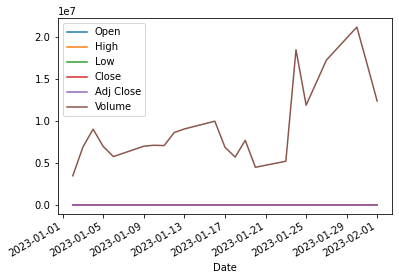

In [208]:
data.loc['2023-01-01': '2023-02-01']

In [ ]:
## datetime and it is an index
## .loc